In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 
from sklearn.model_selection import train_test_split

In [2]:
sns.set_style('darkgrid')
mpl.rcParams['figure.figsize'] = [15,10]

In [3]:
from sklearn.datasets import load_digits

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

Using TensorFlow backend.


In [5]:
digits = load_digits()
X = digits.data
y = to_categorical(digits.target)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   train_size=0.3,
                                                   random_state=42)

In [7]:
# Instantiate a Sequential model
model = Sequential()

# Input and hidden layer with input_shape, 16 neurons, and relu 
model.add(Dense(16, input_shape = (64,), activation = 'relu'))

# Output layer with 10 neurons (one per digit) and softmax
model.add(Dense(10, activation='softmax'))

# Compile your model
model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

# Test if your model works and can process input data
print(model.predict(X_train))

[[2.1978470e-09 7.8904950e-06 1.3723923e-03 ... 1.2219098e-06
  1.4136768e-07 6.6619015e-07]
 [3.0910309e-07 4.0782582e-09 3.4597659e-04 ... 3.2324456e-12
  1.6375798e-05 5.3741989e-10]
 [7.1977038e-09 5.0945778e-06 6.4342744e-06 ... 2.4304895e-04
  5.4442543e-01 5.4721827e-06]
 ...
 [2.2366061e-12 7.6761518e-07 1.0364435e-07 ... 1.0873890e-05
  3.8406961e-05 6.5071885e-11]
 [1.0356732e-11 9.6227359e-10 3.4075171e-13 ... 6.6734597e-11
  5.1243642e-08 1.9233251e-10]
 [3.5345684e-07 4.5621175e-05 1.8747809e-04 ... 1.9075104e-08
  4.4565567e-08 6.7234357e-11]]


In [8]:
def plot_loss(loss,val_loss):
  plt.figure()
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.show()

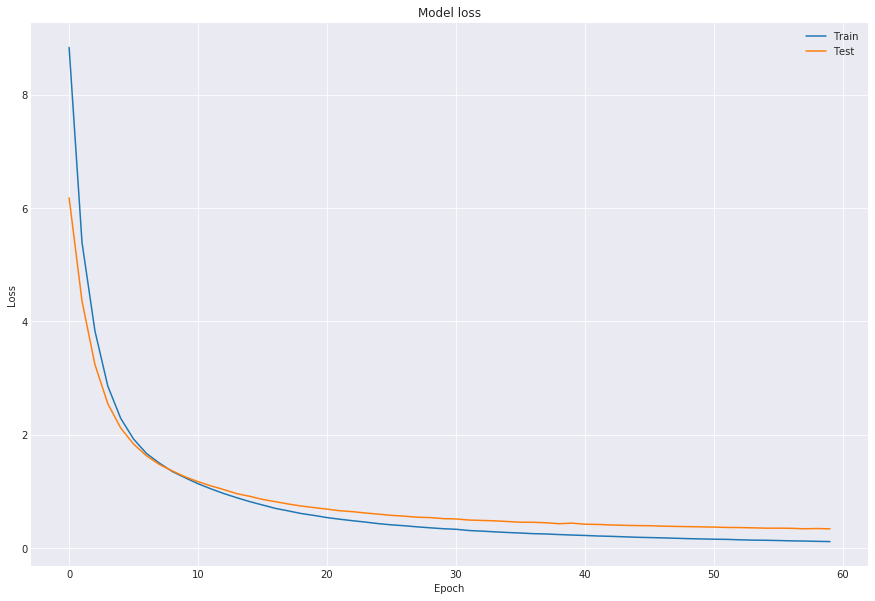

In [9]:
# Train your model for 60 epochs, using X_test and y_test as validation data
history = model.fit(X_train, y_train, epochs=60, 
                    validation_data=(X_test, y_test), verbose=0)

# Extract from the history object loss and val_loss to plot the learning curve
plot_loss(history.history['loss'], history.history['val_loss'])

In [10]:
initial_weights = model.get_weights()

In [11]:
train_sizes = np.array([50, 125, 250, 375, 502])

In [12]:
from keras.callbacks import EarlyStopping

In [13]:
early_stop = EarlyStopping(monitor='loss', 
                       patience=5)

In [14]:
train_accs = []
test_accs = []

```python

for train_size in train_sizes:
    
    #Split a fraction according to train_size
    X_train_frac, _, y_train_frac, _ = train_test_split(X_train, 
                                                        y_train, 
                                                        train_size=train_size)
    
    #Set model initial weights
    model.set_weights(initial_weights)
    
    #Fit model on the training set fraction
    model.fit(X_train_frac, y_train_frac, epochs=100,
             verbose=0, 
             callbacks=[EarlyStopping(monitor='loss', patience=1)])
    
    #Get the accuracy for this training set function
    train_acc = model.evaluate(X_train_frac, y_train_frac, verbose=0)[1]
    train_accs.append(train_acc)
    
    #Get the accuracy on the whole test set
    test_acc = model.evaluate(X_test, y_test, verbose=0)[1]
    test_accs.append(test_acc)
    print('Done with size: ', train_size)```

In [15]:
def plot_results(train_accs,test_accs):
  plt.plot(train_sizes, train_accs, 'o-', label="Training Accuracy")
  plt.plot(train_sizes, test_accs, 'o-', label="Test Accuracy")
  plt.title('Accuracy vs Number of training samples')
  plt.xlabel('Training samples')
  plt.ylabel('Accuracy')
  plt.legend(loc="best")
  plt.show()

1258/1258 [==============================] - 0s 58us/step


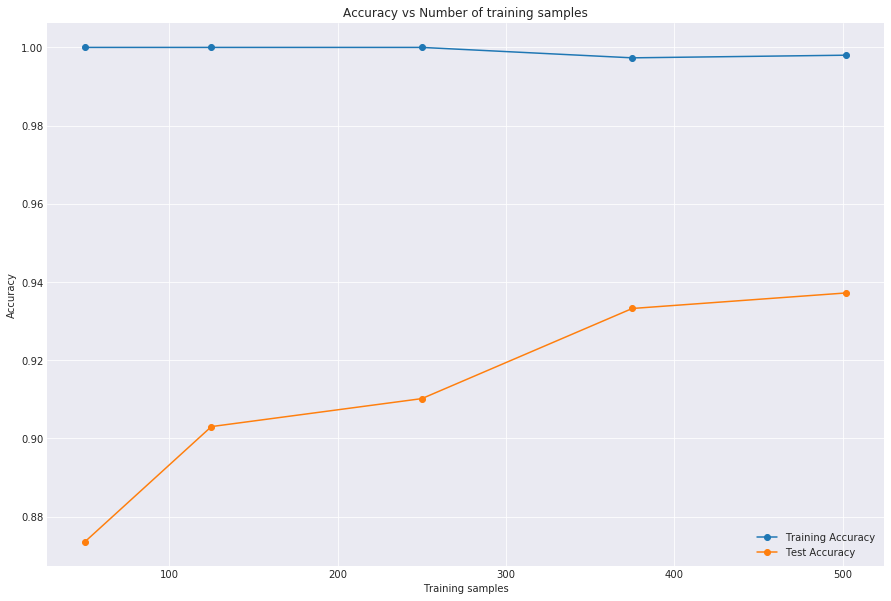

In [16]:
for size in train_sizes:
    # Get a fraction of training data (we only care about the training data)
    X_train_frac, X_test_frac, y_train_frac, y_test_frac = train_test_split(
                                                              X_train, y_train, 
                                                              train_size = size)
    # Set the model weights and fit the model on the training data
    model.set_weights(initial_weights)
    model.fit(X_train_frac, y_train_frac, epochs = 50, callbacks = [early_stop], verbose=0)

    # Evaluate and store the train fraction and the complete test set results
    train_accs.append(model.evaluate(X_train_frac, y_train_frac)[1])
    test_accs.append(model.evaluate(X_test, y_test)[1])

# Plot train vs test accuracies
plot_results(train_accs, test_accs)

### Activation function